Nozzle Details
Outlet Radius: 0.035 m
Throat Radius: 0.013 m
Outlet Area: 0.003848 m²
Throat Area: 0.000531 m²
Position: 0 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1.1 kg/m3
Grain Outer Radius: 0.035 m
Grain Inner Radius: 0.0125 m
Grain Height: 0.3 m
Grain Volume: 0.001 m3
Grain Mass: 0.001 kg

Motor Details
Total Burning Time: 7 s
Total Propellant Mass: 5.001 kg
Average Propellant Exhaust Velocity: 1861.587 m/s
Average Thrust: 1330.000 N
Maximum Thrust: 1330.0000000000002 N at 0.0 s after ignition.
Total Impulse: 9310.000 Ns



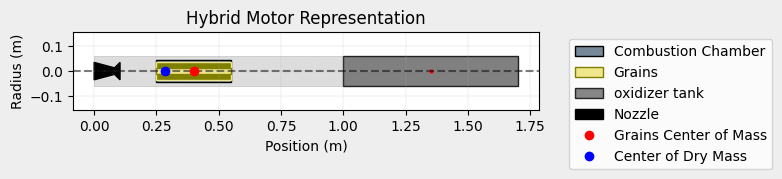

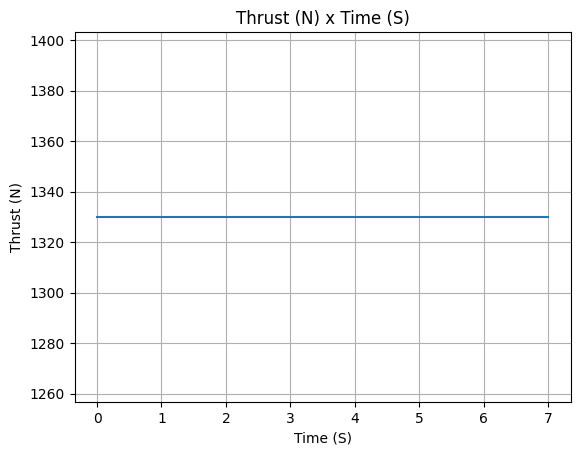

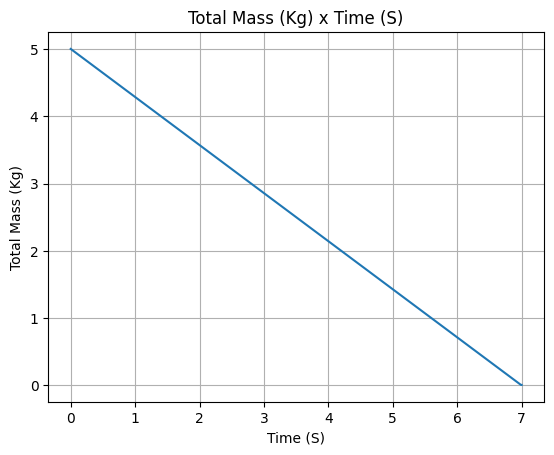

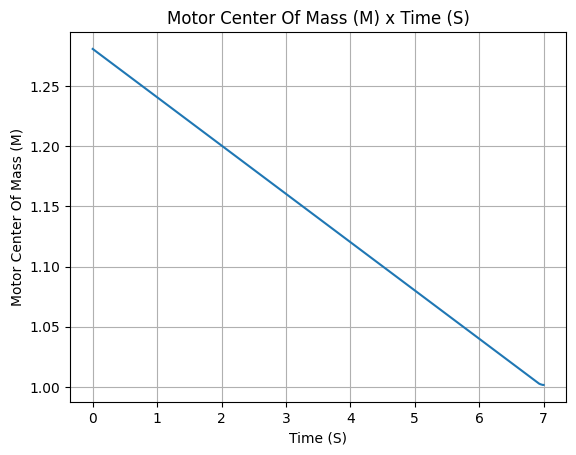

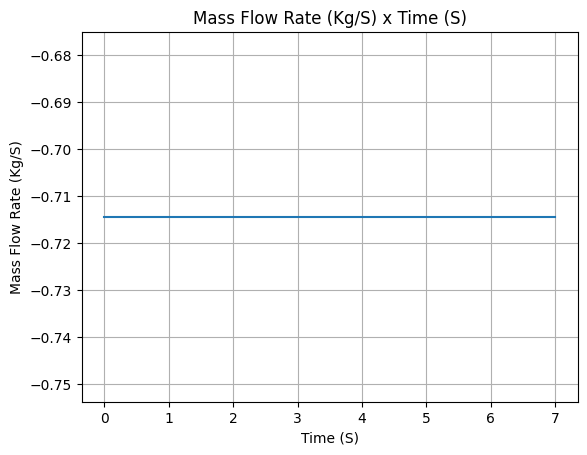

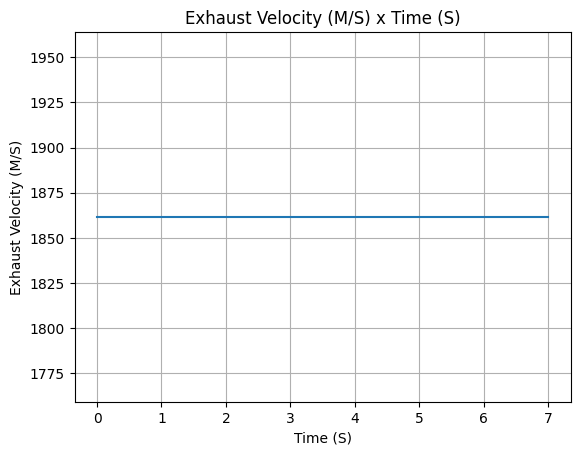

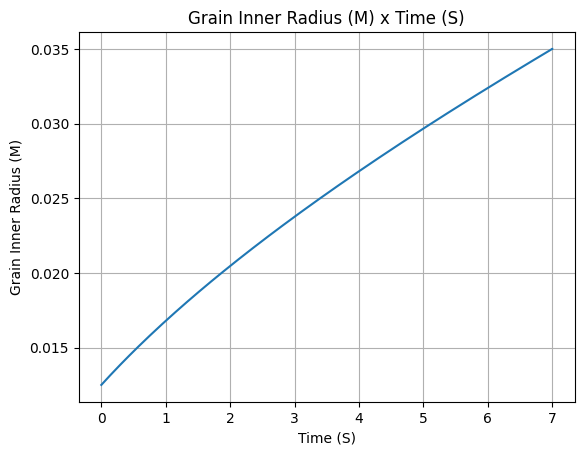

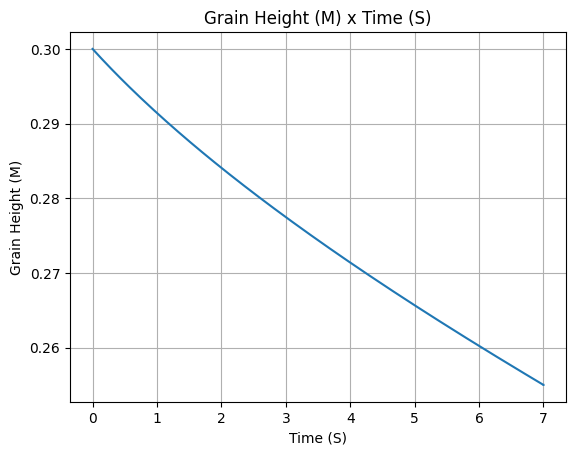

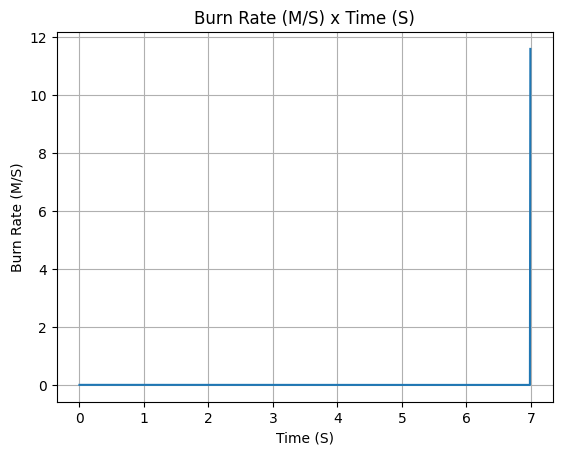

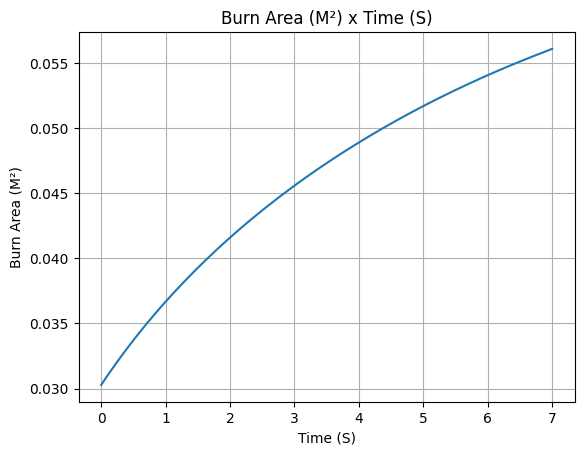

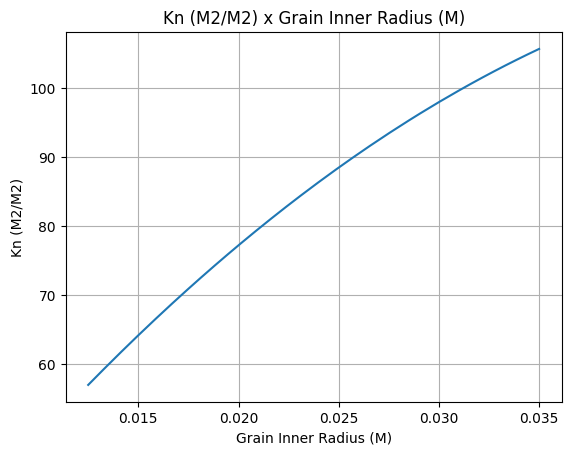

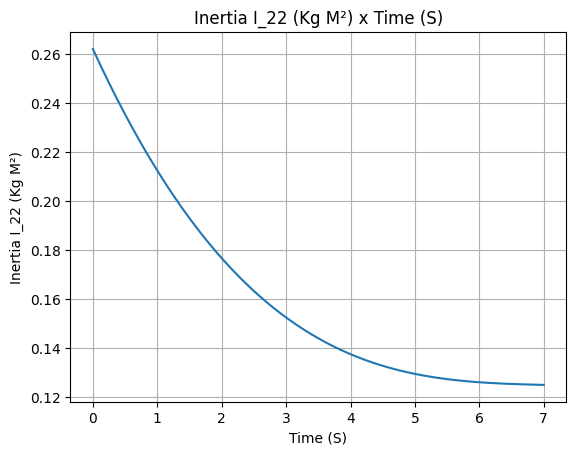

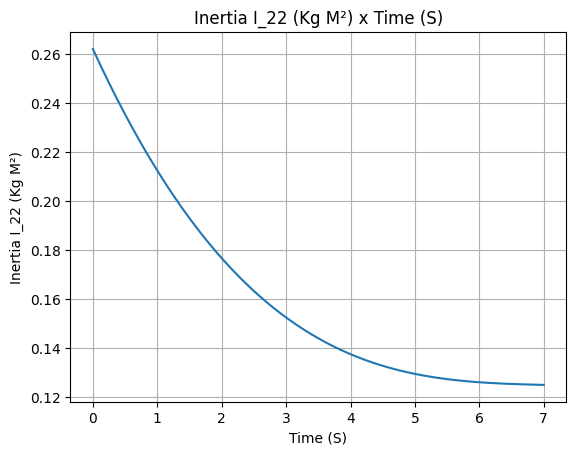

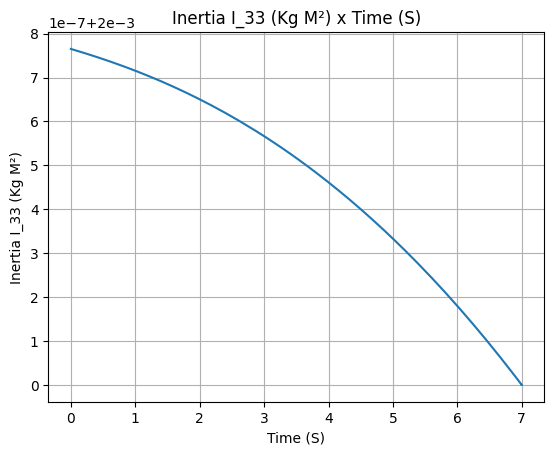

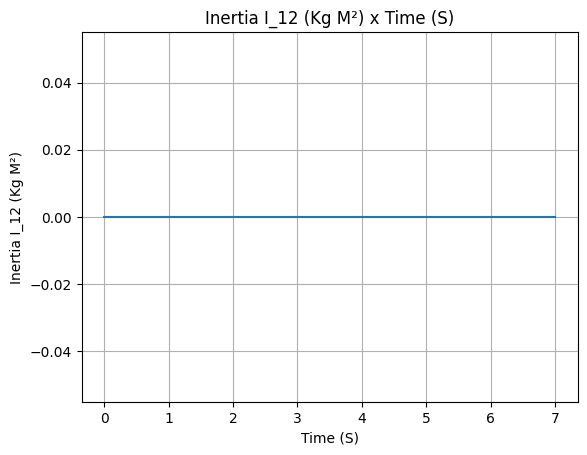

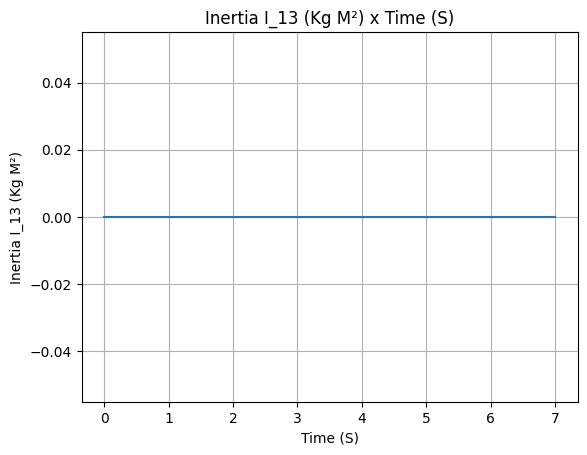

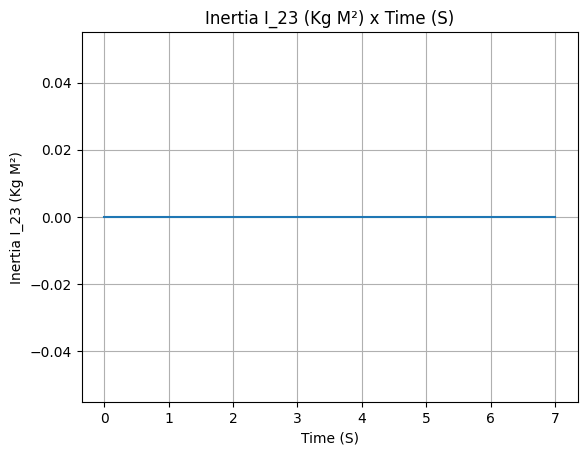


Inertia Details

Rocket Mass: 20.000 kg (without motor)
Rocket Dry Mass: 20.000 kg (with unloaded motor)
Rocket Loaded Mass: 25.001 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 4.725 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.725 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.017 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.065 m
Rocket Frontal Area: 0.013273 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.670 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.389 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.078 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 5.993/rad

Center of Pressure

Nose Cone Center of 

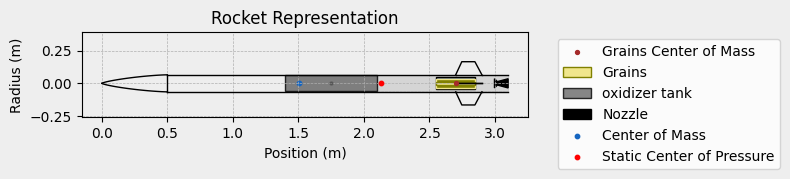


Mass Plots
----------------------------------------


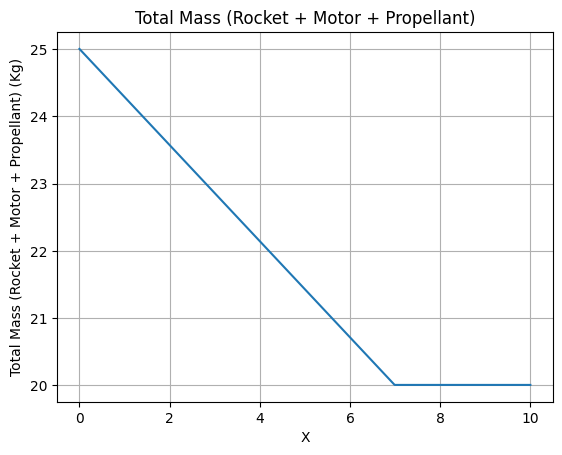

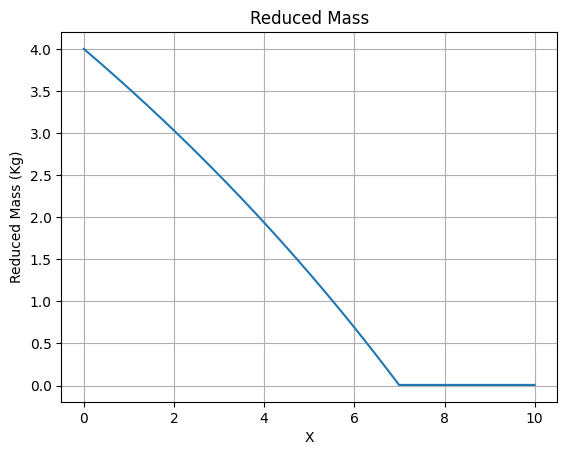


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


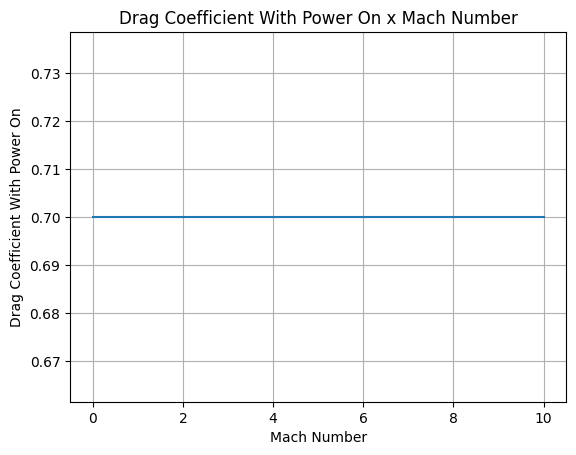

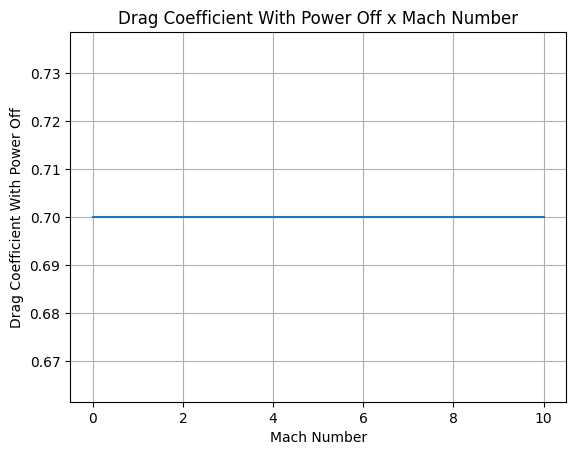


Stability Plots
--------------------


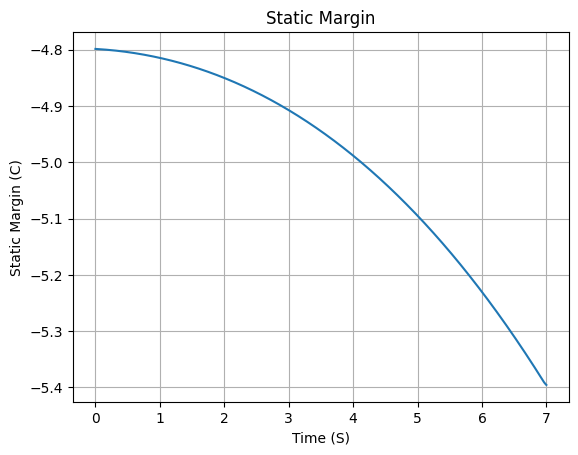

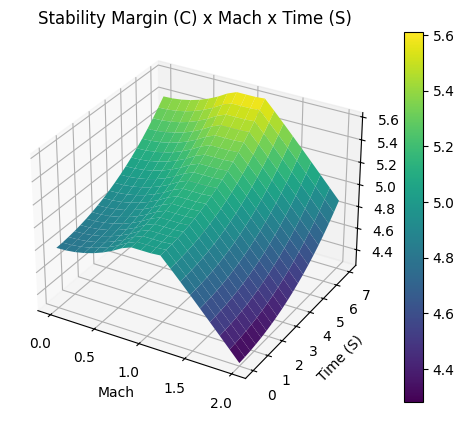


Thrust-to-Weight Plot
----------------------------------------


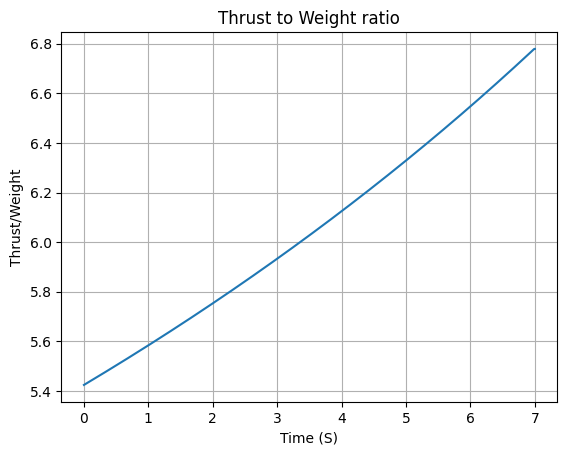


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 165.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.052 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -6.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -10.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 12  m
Launch Rail Inclination: 84.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.744 s
Rail Departure Velocity: 32.661 m/s
Rail Departure Stability Margin: 4.812 c
Rail Departure Angle of Attack: 16.439°
Rail Departure Thrust-Weight Ratio: 5.542
Rail Departure Reynolds Number: 3.085e+05


Burn out State

Burn out time: 7.000 s
Altitude at burn out: 975.938 m (AGL)
Rocket velocity at burn out: 294.462 m/s
Freestream velocity at burn out: 299.218 m/s
Mach Number at burn out: 0.892
Kinetic energy at burn out

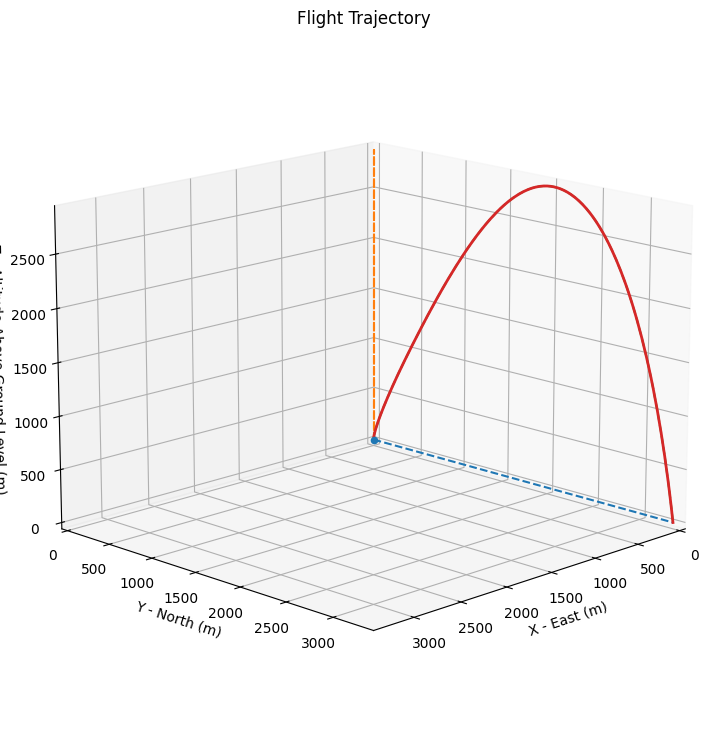



Trajectory Kinematic Plots



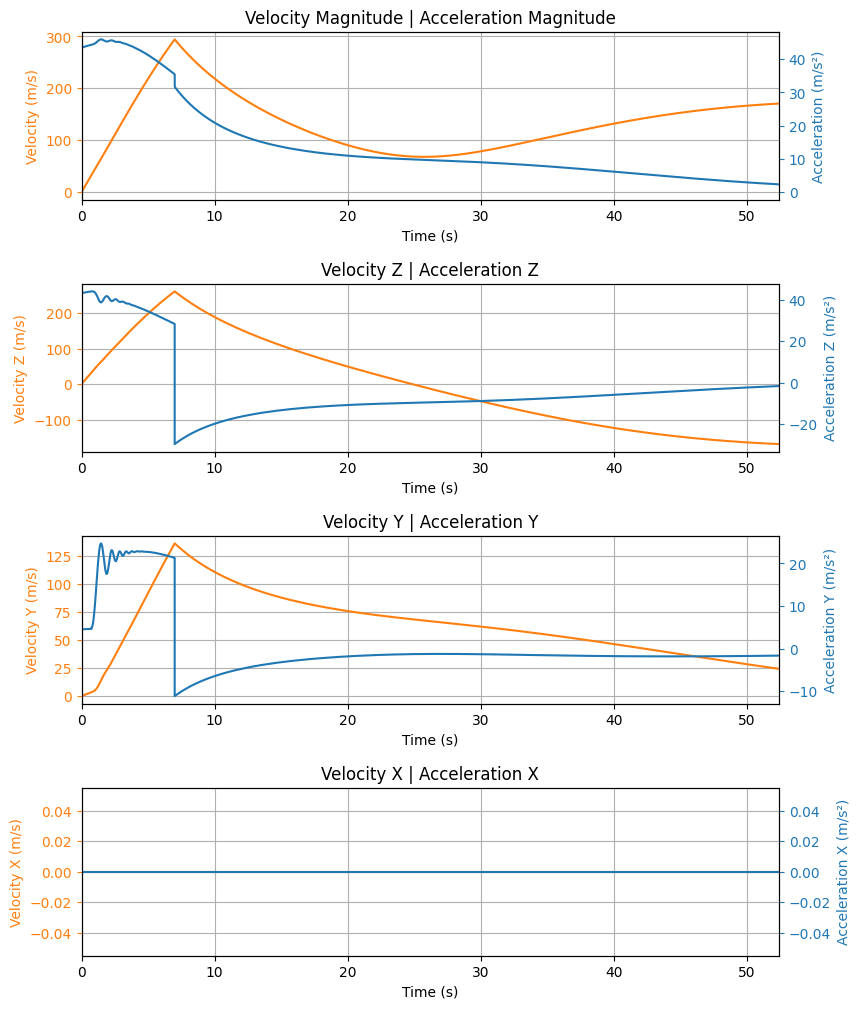



Angular Position Plots



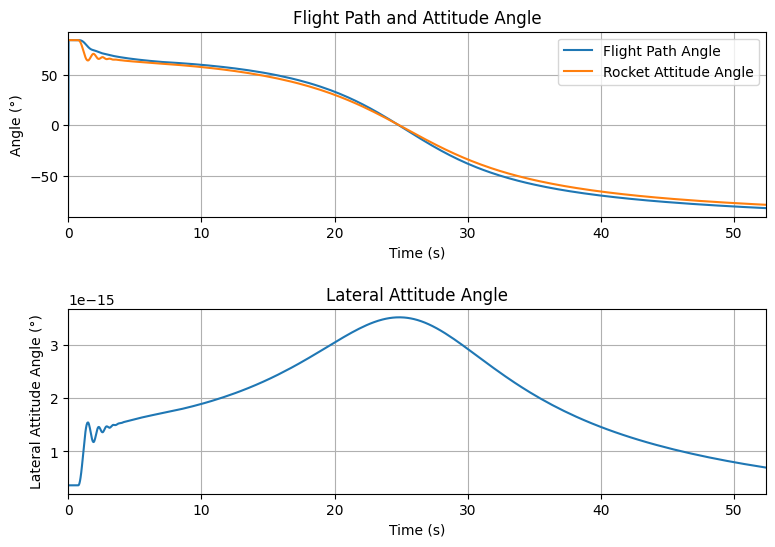



Path, Attitude and Lateral Attitude Angle plots



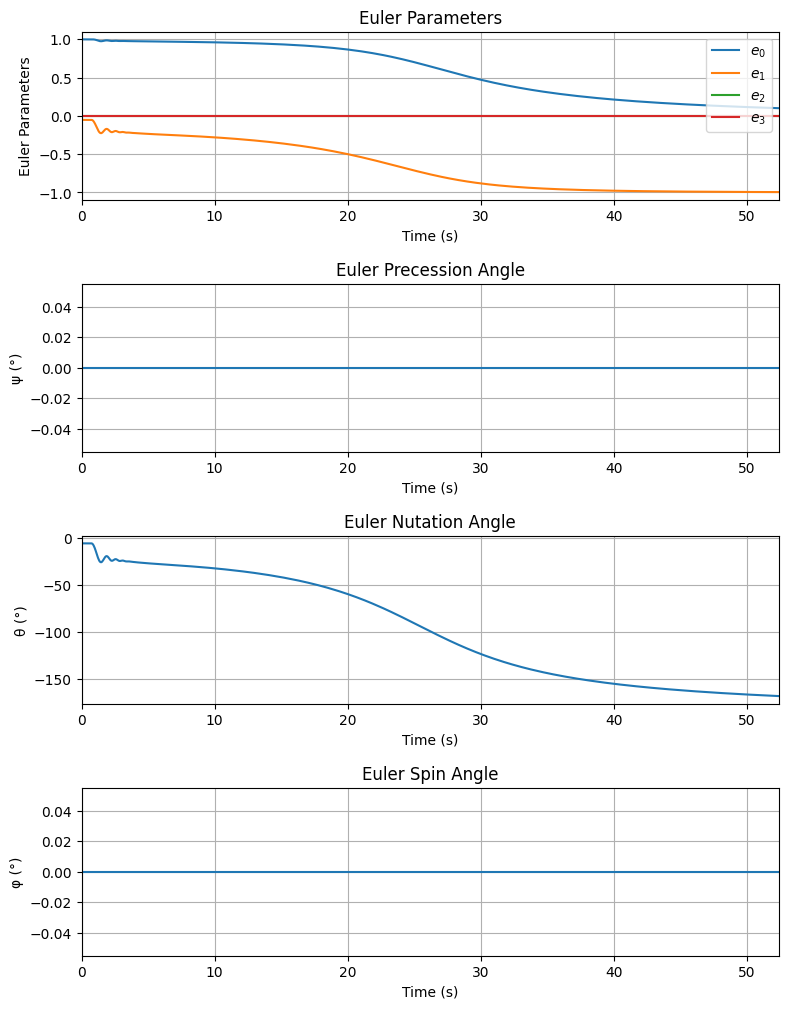



Trajectory Angular Velocity and Acceleration Plots



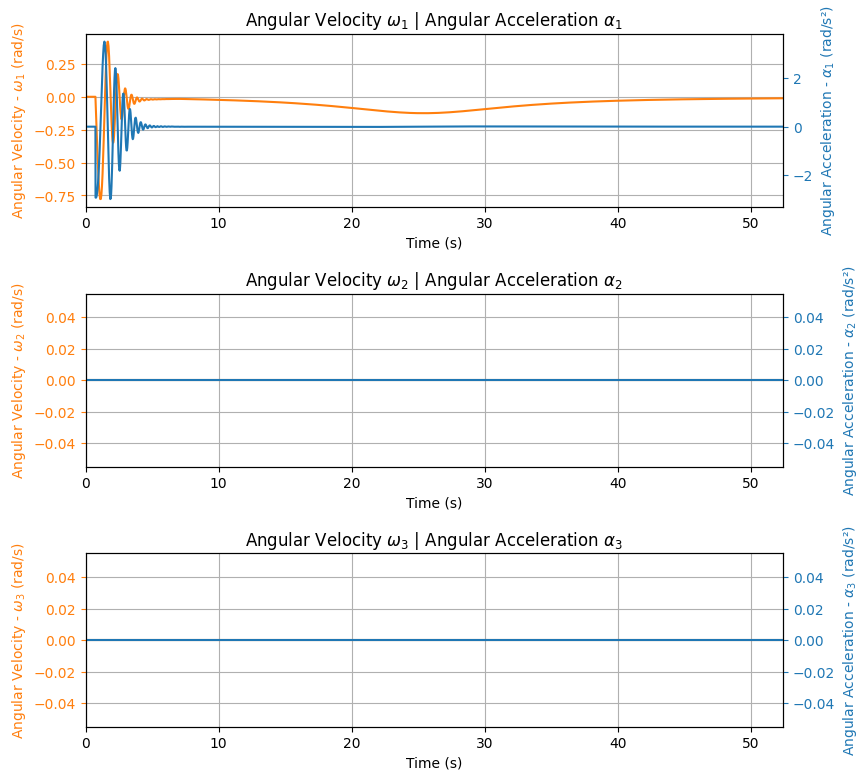



Aerodynamic Forces Plots



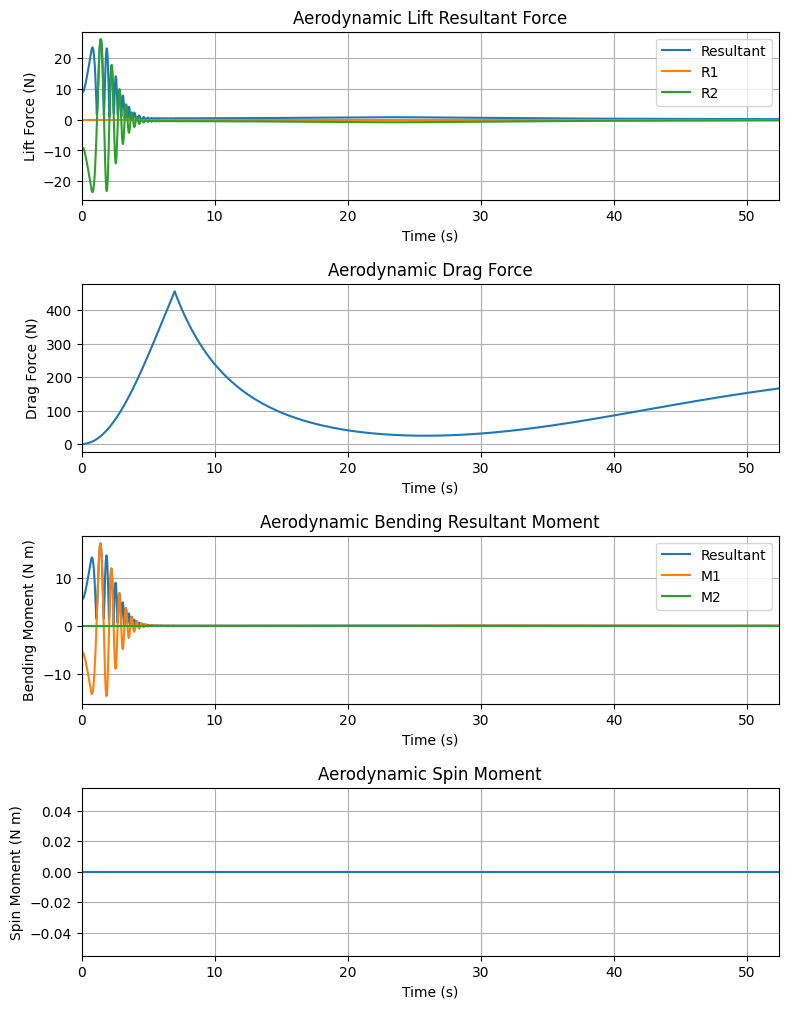



Rail Buttons Forces Plots

No rail buttons were defined. Skipping rail button plots.


Trajectory Energy Plots



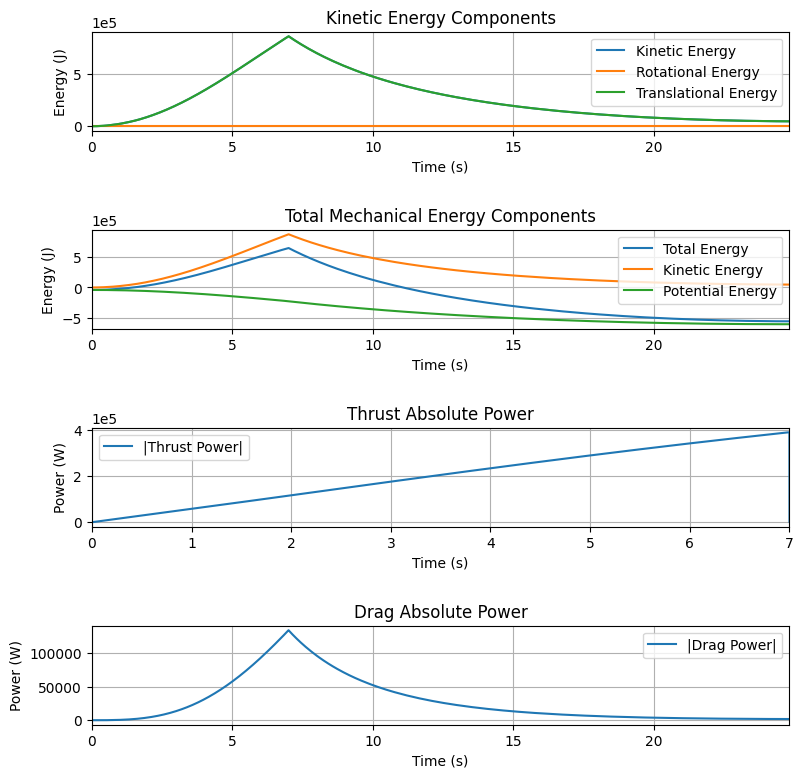



Trajectory Fluid Mechanics Plots



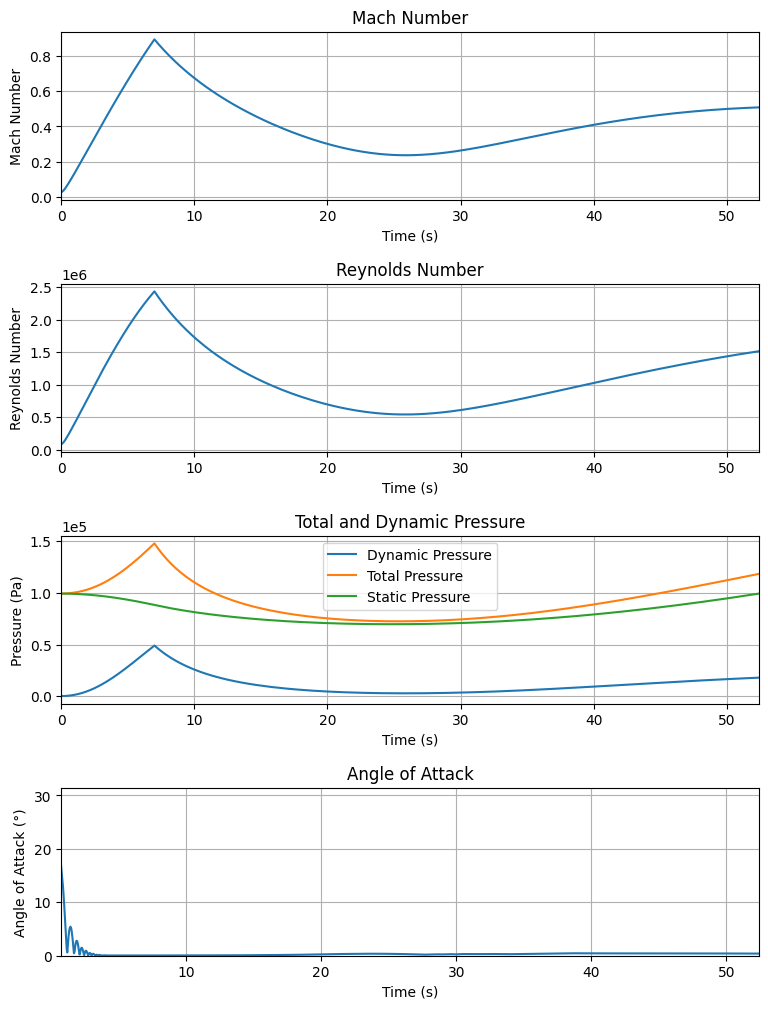



Trajectory Stability and Control Plots



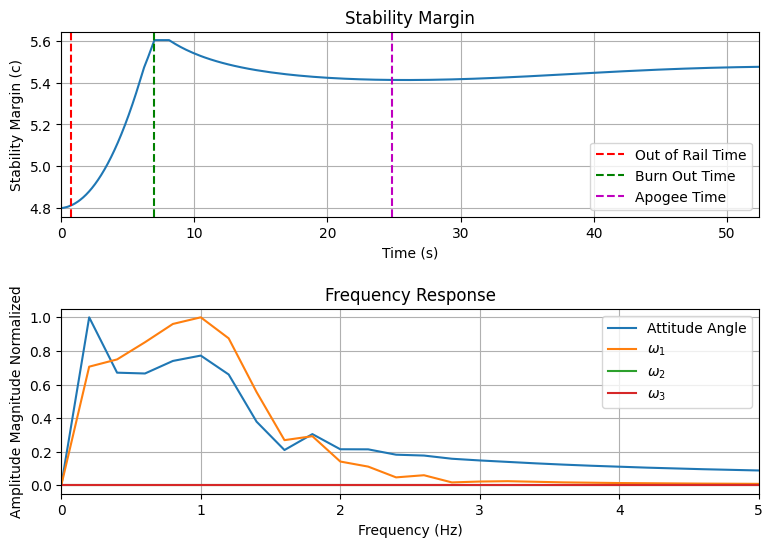



Rocket and Parachute Pressure Plots



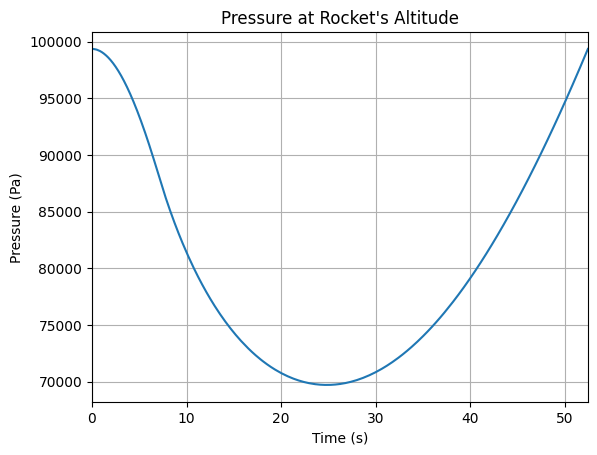


Rocket has no parachutes. No parachute plots available


In [1]:
from rocketpy import Fluid, CylindricalTank, MassFlowRateBasedTank, HybridMotor
from rocketpy import Environment, Rocket, Flight



############################################ Hybrid

# fluids at 20°C
liquid_nox = Fluid(name="lNOx", density=786.6)
vapour_nox = Fluid(name="gNOx", density=159.4)

# Define tank geometry
tank_radius = 120 / 2000
tank_length = 0.7
tank_shape = CylindricalTank(tank_radius, tank_length)

# Define tank
burn_time = 7
nox_mass = 5
ullage_mass = nox_mass * 0.15
mass_flow = nox_mass / burn_time
isp = 190
grain_length = 0.6
nozzle_length = 0.10
plumbing_length = 0.3

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tank_shape,
    flux_time=burn_time - 0.01,
    initial_liquid_mass=nox_mass,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out= mass_flow,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=liquid_nox,
    gas=vapour_nox,
)

fafnir = HybridMotor(
    thrust_source = isp * 9.8 * mass_flow,
    dry_mass = 0, # accounted for in rocket weight
    dry_inertia = (0.125, 0.125, 0.002),
    nozzle_radius = 70 / 2000,
    grain_number = 1,
    grain_separation = 0,
    grain_outer_radius = 70 / 2000,
    grain_initial_inner_radius = 25 / 2000,
    grain_initial_height = 0.3,
    grain_density = 1.1,
    grains_center_of_mass_position = grain_length / 2 + nozzle_length,
    center_of_dry_mass_position = 0.284, # doesn't matter
    nozzle_position = 0,
    burn_time = burn_time,
    throat_radius = 26 / 2000, # why does this matter?
)

fafnir.add_tank(tank=oxidizer_tank, position=plumbing_length + grain_length + nozzle_length + tank_length / 2)




############################################ Flight

ground_level = 165
env = Environment(
    latitude=39.3897,
    longitude=-8.28896388889,
    elevation=ground_level,
    date=(2023, 10, 15, 12),
)

env.set_atmospheric_model("custom_atmosphere", wind_u=0, wind_v=-10)

freya = Rocket(
    radius=0.065,
    mass= 20, # Rocket (no casing)
    inertia=(4.6, 4.6, 0.015), # from open rocket
    power_off_drag=0.7, # from open rocket
    power_on_drag=0.7, # from open rocket
    center_of_mass_without_motor=1.43,
    coordinate_system_orientation="nose_to_tail"
)

freya.add_motor(fafnir, 3.10)

freya.add_nose(
    length=0.50,
    kind="Von Karman",
    position=0,
)

fins = freya.add_trapezoidal_fins(
    4,
    root_chord=0.2,
    tip_chord=0.1,
    span=0.1,
    position=2.7,
    sweep_angle=25
)

# freya.draw()

# freya.all_info()



test_flight = Flight(
    rocket=freya, environment=env, rail_length=12, inclination=84, heading=0
)


fafnir.all_info()
freya.all_info()
test_flight.all_info()